### K-Means Clustering

Lets predict the optimum number of clusters and represent it visually with iris dataset through K-means clustering

In [17]:
#First,importthe necessary libraries required
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Loading the iris dataset
iris = datasets.load_iris()
iris_ds = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_ds.head() # Displaying the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Finding the optimum number of clusters for k-means clustering

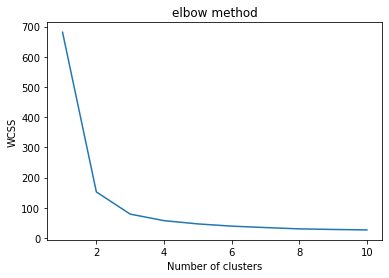

In [18]:
x=iris_ds.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=10,
                 random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Now plotting the result on a line graph
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.ylabel('WCSS')
plt.xlabel('Number of clusters')
plt.show()

In [19]:
#applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

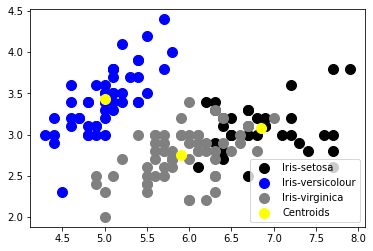

In [20]:
# Now lets visualize the clusters
plt.scatter(x[y_kmeans == 0,0 ], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'grey', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()